In [1]:
import pandas as pd

df = pd.read_csv('organic.csv')
df.head()

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1


In [2]:
df['Gap'] = df['ELUMO'] - df['EHOMO']

X = df[['Q-','Gap']].values

y = df ['Class'].values

In [3]:
print(X.shape)
print(y.shape)

(190, 2)
(190,)


In [4]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()

clf_tree.fit(X,y)

DecisionTreeClassifier()

In [5]:
import matplotlib.pyplot as plt

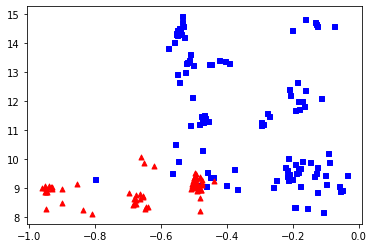

In [6]:
x1 = df.iloc[:114,3]
y1 = df.iloc[:114,7]
x2 = df.iloc[114:,3]
y2 = df.iloc[114:,7]
plt.scatter(x1,y1,c = 'b', marker='s', s =25)
plt.scatter(x2,y2,c = 'r', marker='^', s =25)
plt.show()

In [7]:
import numpy as np

xx, yy = np.meshgrid(np.arange(-1.0,0.0,0.01),np.arange(8,15.2,0.01))

coords = np.stack((xx.reshape(-1),yy.reshape(-1)), axis = 1)

In [8]:
Z = clf_tree.predict(coords)
Z

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [9]:
Z = Z.reshape(xx.shape)
Z

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=int64)

<ipython-input-10-05fa1b713dd5>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=light_rgb)


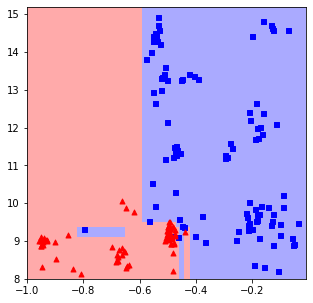

In [10]:
from matplotlib.colors import ListedColormap

light_rgb = ListedColormap(['#AAAAFF','#FFAAAA'])
plt.figure(figsize=(5,5))
plt.pcolormesh(xx,yy,Z,cmap=light_rgb)
plt.scatter(x1,y1,c = 'b', marker='s', s =25)
plt.scatter(x2,y2,c = 'r', marker='^', s =25)
plt.show()

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_svm = make_pipeline(StandardScaler(),SVC(kernel='linear'))
clf_svm.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [12]:
Z = clf_svm.predict(coords)
Z = Z.reshape(xx.shape)

<ipython-input-20-15fe4403bd18>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=light_rgb)


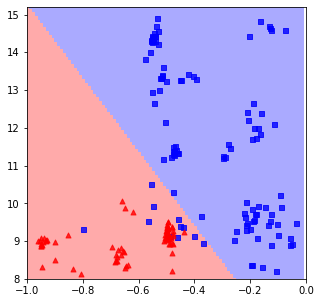

In [20]:
from matplotlib.colors import ListedColormap
light_rgb = ListedColormap(['#AAAAFF','#FFAAAA'])
plt.figure(figsize=(5,5))
plt.pcolormesh(xx,yy,Z,cmap=light_rgb)
plt.scatter(x1,y1,c='b',marker='s',s=25,alpha=0.8)
plt.scatter(x2,y2,c='r',marker='^',s=25,alpha=0.8)
plt.axis((-1.0,0.0,8,15.2))
plt.show()